In [ ]:
!pip install CatBoost

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
economic_data = pd.read_csv('/content/Copy of 2021 lasttt  - 2021ZCTAC5 DP03-Data.csv')

<ipython-input-113-c2a3eef7808a>:1: DtypeWarning: Columns (116) have mixed types. Specify dtype option on import or set low_memory=False.
  economic_data = pd.read_csv('/content/Copy of 2021 lasttt  - 2021ZCTAC5 DP03-Data.csv')


In [ ]:
economic_data = economic_data.iloc[:, :-1]

In [ ]:
economic_data.dtypes

Zip5                                                      int64
Employment Status - 16 years and over - In Labor Force    int64
Labor Force - Civilian (16 years and over)                int64
Employed - Civilian (16 years and over)                   int64
Unemployed - Civilian (16 years and over)                 int64
                                                          ...  
Ins_19to64_NotInLaborForce                                int64
Ins_19to64_NotInLaborForce_WithCoverage                   int64
Ins_19to64_NotInLaborForce_PrivateCoverage                int64
Ins_19to64_NotInLaborForce_PublicCoverage                 int64
NoIns_19to64_NotInLaborForce                              int64
Length: 116, dtype: object

In [ ]:
economic_data=economic_data.fillna(economic_data.mean())

<ipython-input-116-f535b7715dbe>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  economic_data=economic_data.fillna(economic_data.mean())


In [ ]:
economic_data.replace('N', np.nan, inplace=True)

economic_data= economic_data.apply(pd.to_numeric, errors='ignore')

economic_data.replace('-', np.nan, inplace=True)

economic_data= economic_data.apply(pd.to_numeric, errors='ignore')

economic_data = economic_data.fillna(economic_data.mean())

<ipython-input-117-9e3fa84fa339>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  economic_data = economic_data.fillna(economic_data.mean())


In [ ]:
economic_data.head()

,Zip5,Employment Status - 16 years and over - In Labor Force,Labor Force - Civilian (16 years and over),Employed - Civilian (16 years and over),Unemployed - Civilian (16 years and over),Armed Forces - In Labor Force (16 years and over),Not in Labor Force (16 years and over),Civilian Labor Force Estimate,Females 16 years and over Employment Status Estimate,Females 16+ In Labor Force Estimate,...,Ins_19to64_InLaborForce_Unemployed,Ins_19to64_InLaborForce_Unemployed_WithCoverage,Ins_19to64_InLaborForce_Unemployed_PrivateCoverage,Ins_19to64_InLaborForce_Unemployed_PublicCoverage,NoIns_19to64_InLaborForce_Unemployed,Ins_19to64_NotInLaborForce,Ins_19to64_NotInLaborForce_WithCoverage,Ins_19to64_NotInLaborForce_PrivateCoverage,Ins_19to64_NotInLaborForce_PublicCoverage,NoIns_19to64_NotInLaborForce
0,601,5566,5566,4170,1396,0,8713,5566,7231,2235,...,1369,1270,55,1241,99,4877,4428,559,3961,449
1,602,12218,12218,11279,939,0,20134,12218,16570,5140,...,931,799,108,691,132,11373,10764,2341,8840,609
2,603,15859,15784,13072,2712,75,25661,15784,21572,6945,...,2597,2492,471,2078,105,13041,11882,3049,9319,1159
3,606,1633,1633,1520,113,0,3278,1633,2462,646,...,109,109,0,109,0,1789,1709,266,1491,80
4,610,9464,9464,8609,855,0,12920,9464,11557,4327,...,749,611,109,502,138,6733,6150,1410,4908,583


Index(['Zip5', 'Employment Status - 16 years and over - In Labor Force',
       'Labor Force - Civilian (16 years and over)',
       'Employed - Civilian (16 years and over)',
       'Unemployed - Civilian (16 years and over)',
       'Armed Forces - In Labor Force (16 years and over)',
       'Not in Labor Force (16 years and over)',
       'Civilian Labor Force Estimate',
       'Females 16 years and over Employment Status Estimate',
       'Females 16+ In Labor Force Estimate',
       ...
       'Ins_19to64_InLaborForce_Unemployed',
       'Ins_19to64_InLaborForce_Unemployed_WithCoverage',
       'Ins_19to64_InLaborForce_Unemployed_PrivateCoverage',
       'Ins_19to64_InLaborForce_Unemployed_PublicCoverage',
       'NoIns_19to64_InLaborForce_Unemployed', 'Ins_19to64_NotInLaborForce',
       'Ins_19to64_NotInLaborForce_WithCoverage',
       'Ins_19to64_NotInLaborForce_PrivateCoverage',
       'Ins_19to64_NotInLaborForce_PublicCoverage',
       'NoIns_19to64_NotInLaborForce'],
      d

In [ ]:
def remove_plus(value):
    if isinstance(value, str):
        return value.replace('+', '')
    else:
        return value

economic_features_no_plus = economic_data.applymap(remove_plus)

economic_features_no_plus = economic_features_no_plus.replace({',': ''}, regex=True)
economic_features_no_plus = economic_features_no_plus.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='mean')
economic_features_imputed = pd.DataFrame(imputer.fit_transform(economic_features_no_plus), columns=economic_features_no_plus.columns)


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(economic_features_imputed)

num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
economic_features_imputed['cluster'] = kmeans.fit_predict(scaled_features)

economic_features_imputed.to_csv('economic_clusters.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(economic_features_imputed.columns)


Index(['Zip5', 'Employment Status - 16 years and over - In Labor Force',
       'Labor Force - Civilian (16 years and over)',
       'Employed - Civilian (16 years and over)',
       'Unemployed - Civilian (16 years and over)',
       'Armed Forces - In Labor Force (16 years and over)',
       'Not in Labor Force (16 years and over)',
       'Civilian Labor Force Estimate',
       'Females 16 years and over Employment Status Estimate',
       'Females 16+ In Labor Force Estimate',
       ...
       'Ins_19to64_InLaborForce_Unemployed_WithCoverage',
       'Ins_19to64_InLaborForce_Unemployed_PrivateCoverage',
       'Ins_19to64_InLaborForce_Unemployed_PublicCoverage',
       'NoIns_19to64_InLaborForce_Unemployed', 'Ins_19to64_NotInLaborForce',
       'Ins_19to64_NotInLaborForce_WithCoverage',
       'Ins_19to64_NotInLaborForce_PrivateCoverage',
       'Ins_19to64_NotInLaborForce_PublicCoverage',
       'NoIns_19to64_NotInLaborForce', 'cluster'],
      dtype='object', length=117)


In [ ]:
#2
economic_clusters = pd.read_csv('/content/economic_clusters.csv')
patient_data = pd.read_csv('/content/NO DASHFinarb Dataset (Sample).xlsx - in.csv')


In [ ]:
patient_data

,AdmissionID,PatientID,Age,Sex,Zip5,State,City,Hospital_State,Hospital_Zip5,AdmissionDate,Total_Charges,Updated_Status,Hospital_Classification
0,14082713,7983725,1.0,M,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,11916.12,INV,I
1,14082712,7983724,27.0,F,22204,VA,ARLINGTON,VA,22031.0,1/25/2023,1594.07,RHI,O
2,14082709,2591961,60.0,M,22304,VA,Alexandria,VA,22031.0,1/25/2023,206.07,RBD,I
3,14082708,2591961,60.0,M,22304,VA,Alexandria,VA,22031.0,1/25/2023,529.70,RBD,I
4,14082707,7983723,0.0,M,77037,TX,HOUSTON,TX,77008.0,1/25/2023,1603.75,INV,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,13519459,7758070,31.0,M,91744,CA,LA PUENTE,CA,91706.0,1/3/2023,3174.10,INV,O
49995,13519458,7758069,76.0,M,900474602,CA,LOS ANGELES,CA,90710.0,1/5/2023,72306.55,RNQ,I
49996,13519448,6944978,71.0,M,91911,CA,CHULA VISTA,CA,92120.0,12/16/2022,222978.20,RCA,I
49997,13519435,7758052,64.0,F,902782210,CA,REDONDO BEACH,CA,92806.0,1/5/2023,4274.20,RHI,O


In [ ]:
economic_clusters

,Zip5,Employment Status - 16 years and over - In Labor Force,Labor Force - Civilian (16 years and over),Employed - Civilian (16 years and over),Unemployed - Civilian (16 years and over),Armed Forces - In Labor Force (16 years and over),Not in Labor Force (16 years and over),Civilian Labor Force Estimate,Females 16 years and over Employment Status Estimate,Females 16+ In Labor Force Estimate,...,Ins_19to64_InLaborForce_Unemployed_WithCoverage,Ins_19to64_InLaborForce_Unemployed_PrivateCoverage,Ins_19to64_InLaborForce_Unemployed_PublicCoverage,NoIns_19to64_InLaborForce_Unemployed,Ins_19to64_NotInLaborForce,Ins_19to64_NotInLaborForce_WithCoverage,Ins_19to64_NotInLaborForce_PrivateCoverage,Ins_19to64_NotInLaborForce_PublicCoverage,NoIns_19to64_NotInLaborForce,cluster
0,601.0,5566.0,5566.0,4170.0,1396.0,0.0,8713.0,5566.0,7231.0,2235.0,...,1270.0,55.0,1241.0,99.0,4877.0,4428.0,559.0,3961.0,449.0,3
1,602.0,12218.0,12218.0,11279.0,939.0,0.0,20134.0,12218.0,16570.0,5140.0,...,799.0,108.0,691.0,132.0,11373.0,10764.0,2341.0,8840.0,609.0,3
2,603.0,15859.0,15784.0,13072.0,2712.0,75.0,25661.0,15784.0,21572.0,6945.0,...,2492.0,471.0,2078.0,105.0,13041.0,11882.0,3049.0,9319.0,1159.0,3
3,606.0,1633.0,1633.0,1520.0,113.0,0.0,3278.0,1633.0,2462.0,646.0,...,109.0,0.0,109.0,0.0,1789.0,1709.0,266.0,1491.0,80.0,5
4,610.0,9464.0,9464.0,8609.0,855.0,0.0,12920.0,9464.0,11557.0,4327.0,...,611.0,109.0,502.0,138.0,6733.0,6150.0,1410.0,4908.0,583.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32918,99923.0,13.0,13.0,13.0,0.0,0.0,0.0,13.0,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
32919,99925.0,475.0,475.0,426.0,49.0,0.0,258.0,475.0,343.0,231.0,...,26.0,3.0,23.0,9.0,129.0,94.0,14.0,84.0,35.0,17
32920,99926.0,642.0,642.0,540.0,102.0,0.0,471.0,642.0,488.0,247.0,...,43.0,0.0,43.0,59.0,245.0,212.0,22.0,190.0,33.0,5
32921,99927.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,11.0,11.0,11.0,0.0,0.0,17


In [ ]:
economic_clusters.columns

Index(['Zip5', 'Employment Status - 16 years and over - In Labor Force',
       'Labor Force - Civilian (16 years and over)',
       'Employed - Civilian (16 years and over)',
       'Unemployed - Civilian (16 years and over)',
       'Armed Forces - In Labor Force (16 years and over)',
       'Not in Labor Force (16 years and over)',
       'Civilian Labor Force Estimate',
       'Females 16 years and over Employment Status Estimate',
       'Females 16+ In Labor Force Estimate',
       ...
       'Ins_19to64_InLaborForce_Unemployed_WithCoverage',
       'Ins_19to64_InLaborForce_Unemployed_PrivateCoverage',
       'Ins_19to64_InLaborForce_Unemployed_PublicCoverage',
       'NoIns_19to64_InLaborForce_Unemployed', 'Ins_19to64_NotInLaborForce',
       'Ins_19to64_NotInLaborForce_WithCoverage',
       'Ins_19to64_NotInLaborForce_PrivateCoverage',
       'Ins_19to64_NotInLaborForce_PublicCoverage',
       'NoIns_19to64_NotInLaborForce', 'cluster'],
      dtype='object', length=117)

In [ ]:
economic_clusters['Zip5'] = pd.to_numeric(economic_clusters['Zip5'], errors='coerce')
economic_clusters['Zip5'] = economic_clusters['Zip5'].astype('Int64')

In [ ]:
economic_clusters['Zip5'] = economic_clusters['Zip5'].astype(str)

In [ ]:
patient_data['Zip5'] = patient_data['Zip5'].astype(str)

In [ ]:
patient_data=patient_data.rename(columns={'Zip5': 'Zip5'})

In [ ]:
patient_data['Zip5']

0            22193
1            22204
2            22304
3            22304
4            77037
           ...    
49994        91744
49995    900474602
49996        91911
49997    902782210
49998    928401323
Name: Zip5, Length: 49999, dtype: object

In [ ]:
economic_clusters['Zip5']

0          601
1          602
2          603
3          606
4          610
         ...  
32918    99923
32919    99925
32920    99926
32921    99927
32922    99929
Name: Zip5, Length: 32923, dtype: object

In [ ]:
merged_data = pd.merge(patient_data, economic_clusters, on='Zip5', how='inner')

In [ ]:
merged_data.columns

Index(['AdmissionID', 'PatientID', 'Age', 'Sex', 'Zip5', 'State', 'City',
       'Hospital_State', 'Hospital_Zip5', 'AdmissionDate',
       ...
       'Ins_19to64_InLaborForce_Unemployed_WithCoverage',
       'Ins_19to64_InLaborForce_Unemployed_PrivateCoverage',
       'Ins_19to64_InLaborForce_Unemployed_PublicCoverage',
       'NoIns_19to64_InLaborForce_Unemployed', 'Ins_19to64_NotInLaborForce',
       'Ins_19to64_NotInLaborForce_WithCoverage',
       'Ins_19to64_NotInLaborForce_PrivateCoverage',
       'Ins_19to64_NotInLaborForce_PublicCoverage',
       'NoIns_19to64_NotInLaborForce', 'cluster'],
      dtype='object', length=129)

In [ ]:
merged_data

,AdmissionID,PatientID,Age,Sex,Zip5,State,City,Hospital_State,Hospital_Zip5,AdmissionDate,...,Ins_19to64_InLaborForce_Unemployed_WithCoverage,Ins_19to64_InLaborForce_Unemployed_PrivateCoverage,Ins_19to64_InLaborForce_Unemployed_PublicCoverage,NoIns_19to64_InLaborForce_Unemployed,Ins_19to64_NotInLaborForce,Ins_19to64_NotInLaborForce_WithCoverage,Ins_19to64_NotInLaborForce_PrivateCoverage,Ins_19to64_NotInLaborForce_PublicCoverage,NoIns_19to64_NotInLaborForce,cluster
0,14082713,7983725,1.0,M,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
1,14082585,7983688,0.0,M,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
2,14082323,7983472,27.0,F,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
3,14082209,7983456,2.0,M,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
4,14082164,2123949,28.0,F,22193,VA,DALE CITY,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43278,13519672,7758223,17.0,M,52722,IA,BETTENDORF,FL,33064.0,1/7/2023,...,365.0,231.0,147.0,165.0,3410.0,3204.0,2405.0,1012.0,206.0,6
43279,13519645,7758201,28.0,F,71730,AR,EL DORADO,OK,73102.0,1/7/2023,...,302.0,151.0,160.0,136.0,5473.0,4527.0,2142.0,2877.0,946.0,8
43280,13519579,7750658,8.0,F,62870,IL,ODIN,IL,62801.0,1/7/2023,...,51.0,16.0,35.0,1.0,284.0,244.0,139.0,112.0,40.0,5
43281,13519571,7758146,52.0,M,74107,OK,TULSA,OK,73102.0,1/7/2023,...,318.0,145.0,190.0,306.0,2795.0,2035.0,1007.0,1246.0,760.0,11


In [ ]:
merged_data.drop_duplicates()

,AdmissionID,PatientID,Age,Sex,Zip5,State,City,Hospital_State,Hospital_Zip5,AdmissionDate,...,Ins_19to64_InLaborForce_Unemployed_WithCoverage,Ins_19to64_InLaborForce_Unemployed_PrivateCoverage,Ins_19to64_InLaborForce_Unemployed_PublicCoverage,NoIns_19to64_InLaborForce_Unemployed,Ins_19to64_NotInLaborForce,Ins_19to64_NotInLaborForce_WithCoverage,Ins_19to64_NotInLaborForce_PrivateCoverage,Ins_19to64_NotInLaborForce_PublicCoverage,NoIns_19to64_NotInLaborForce,cluster
0,14082713,7983725,1.0,M,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
1,14082585,7983688,0.0,M,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
2,14082323,7983472,27.0,F,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
3,14082209,7983456,2.0,M,22193,VA,WOODBRIDGE,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
4,14082164,2123949,28.0,F,22193,VA,DALE CITY,VA,22031.0,1/25/2023,...,1353.0,931.0,495.0,877.0,8824.0,6545.0,5564.0,1677.0,2279.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43278,13519672,7758223,17.0,M,52722,IA,BETTENDORF,FL,33064.0,1/7/2023,...,365.0,231.0,147.0,165.0,3410.0,3204.0,2405.0,1012.0,206.0,6
43279,13519645,7758201,28.0,F,71730,AR,EL DORADO,OK,73102.0,1/7/2023,...,302.0,151.0,160.0,136.0,5473.0,4527.0,2142.0,2877.0,946.0,8
43280,13519579,7750658,8.0,F,62870,IL,ODIN,IL,62801.0,1/7/2023,...,51.0,16.0,35.0,1.0,284.0,244.0,139.0,112.0,40.0,5
43281,13519571,7758146,52.0,M,74107,OK,TULSA,OK,73102.0,1/7/2023,...,318.0,145.0,190.0,306.0,2795.0,2035.0,1007.0,1246.0,760.0,11


In [ ]:
merged_data['Sex'] = merged_data['Sex'].astype(str)
label_encoder = LabelEncoder()
merged_data['Sex'] = label_encoder.fit_transform(merged_data['Sex'])


In [ ]:
merged_data['Updated_Status'] = merged_data['Updated_Status'].astype(str)


status_dummies = pd.get_dummies(merged_data['Updated_Status'], prefix='Update_Status', drop_first=False)

merged_data = pd.concat([merged_data, status_dummies], axis=1)

merged_data.drop('Updated_Status', axis=1, inplace=True)

print(merged_data.head())

   AdmissionID  PatientID   Age  Sex   Zip5 State        City Hospital_State  \
0     14082713    7983725   1.0    1  22193    VA  WOODBRIDGE             VA   
1     14082585    7983688   0.0    1  22193    VA  WOODBRIDGE             VA   
2     14082323    7983472  27.0    0  22193    VA  WOODBRIDGE             VA   
3     14082209    7983456   2.0    1  22193    VA  WOODBRIDGE             VA   
4     14082164    2123949  28.0    0  22193    VA   DALE CITY             VA   

   Hospital_Zip5 AdmissionDate  ...  \
0        22031.0     1/25/2023  ...   
1        22031.0     1/25/2023  ...   
2        22031.0     1/25/2023  ...   
3        22031.0     1/25/2023  ...   
4        22031.0     1/25/2023  ...   

   Ins_19to64_NotInLaborForce_PublicCoverage NoIns_19to64_NotInLaborForce  \
0                                     1677.0                       2279.0   
1                                     1677.0                       2279.0   
2                                     1677.0         

In [ ]:
# Example using mean target encoding
mean_target_encoding = merged_data.groupby('State')['Update_Status_INV'].mean()
merged_data['State_encoded'] = merged_data['State'].map(mean_target_encoding)
mean_target_encoding = merged_data.groupby('City')['Update_Status_INV'].mean()
merged_data['City_encoded'] = merged_data['City'].map(mean_target_encoding)


In [ ]:
merged_data['City_encoded']

0        0.439394
1        0.439394
2        0.439394
3        0.439394
4        0.333333
           ...   
43278    0.000000
43279    0.000000
43280    0.000000
43281    0.125000
43282    0.000000
Name: City_encoded, Length: 43283, dtype: float64

In [ ]:

merged_data['year'] = pd.to_datetime(merged_data['AdmissionDate']).dt.year
merged_data['month'] = pd.to_datetime(merged_data['AdmissionDate']).dt.month
merged_data['day'] = pd.to_datetime(merged_data['AdmissionDate']).dt.day
merged_data['day_of_week'] = pd.to_datetime(merged_data['AdmissionDate']).dt.dayofweek

In [ ]:
# **# Assuming 'Hospital_Classification' is the correct column name
# merged_data['Hospital_Classification'] = merged_data['Hospital_Classification'].astype(str)

# # Assuming 'Hospital_Classification' is the correct column name
# merged_data['Hospital_Classification'] = merged_data['Hospital_Classification'].astype(str)

# # Check unique values before creating dummy variables
# unique_classes_before = merged_data['Hospital_Classification'].unique()
# print("Unique classes before:", unique_classes_before)

# # Create dummy variables only if there are two unique classes
# if len(unique_classes_before) == 2:
#     class_dummies = pd.get_dummies(merged_data['Hospital_Classification'], prefix='Hospital_Class', drop_first=False)

#     # Concatenate the dummy variables with the original DataFrame
#     merged_data = pd.concat([merged_data, class_dummies], axis=1)

#     # Drop the original 'Hospital_Classification' column
#     merged_data.drop('Hospital_Classification', axis=1, inplace=True)
# else:
#     print("There are not exactly two unique classes in 'Hospital_Classification'.")

# # Check unique values after creating dummy variables
# unique_classes_after = merged_data[['Hospital_Class_O', 'Hospital_Class_I']].agg('unique')
# print("Unique classes after:", unique_classes_after)

# print(merged_data.head())**



In [ ]:
merged_data['Sex'] = merged_data['Sex'].astype(str)

In [ ]:
df_inpatient = merged_data[merged_data['Hospital_Classification'] == 'I']
df_outpatient = merged_data[merged_data['Hospital_Classification'] == 'O']

In [ ]:
columns_to_drop = ['Zip5','AdmissionID','PatientID','Update_Status_INV','Update_Status_NFA' ,'Update_Status_RBD','Update_Status_RCA', 'Update_Status_RHI', 'Update_Status_RNQ', 'Hospital_Zip5','State', 'City','AdmissionDate','Hospital_State' ,'Hospital_Classification']

In [ ]:
X = df_inpatient.drop(columns=columns_to_drop)
y = df_inpatient['Update_Status_INV']

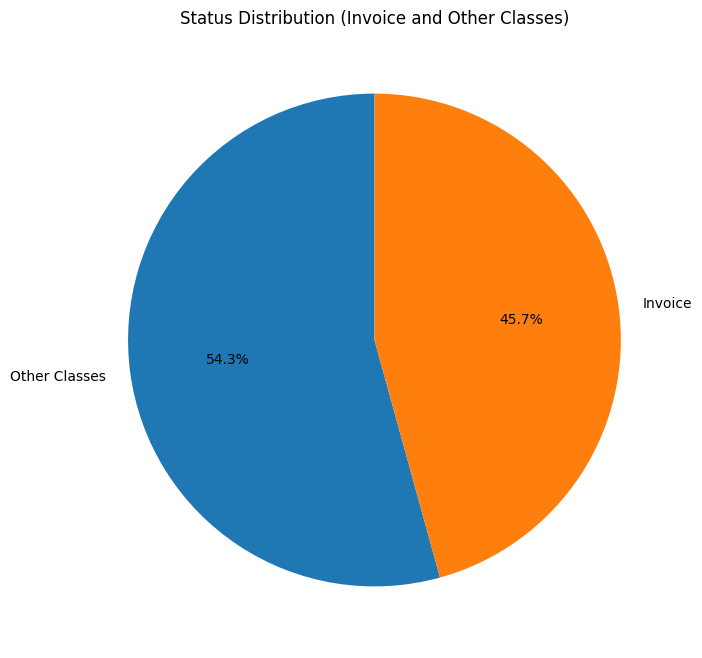

In [ ]:
status_counts = df_inpatient['Update_Status_INV'].value_counts()

status_counts.index = status_counts.index.astype(str).map({'1': 'Invoice', '0': 'Other Classes'})
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Status Distribution (Invoice and Other Classes)')
plt.show()

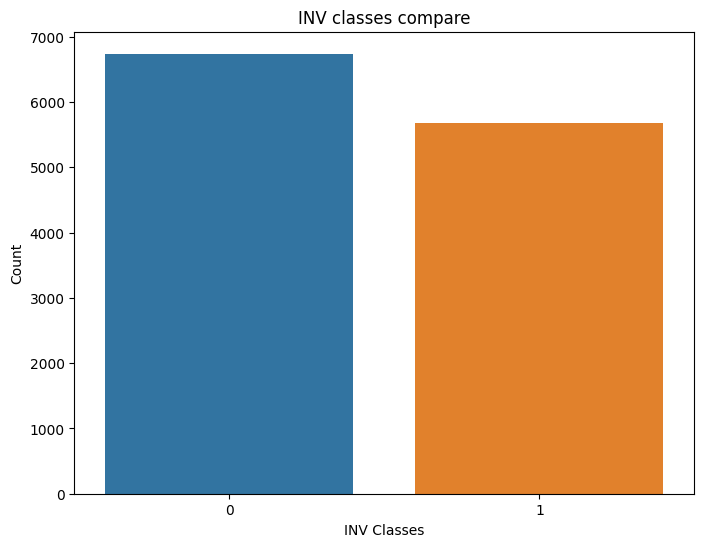

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('INV classes compare')
plt.xlabel('INV Classes')
plt.ylabel('Count')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# #CatBoost
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# smote = SMOTE(sampling_strategy='auto', random_state=42)

# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# plt.figure(figsize=(8, 6))
# sns.countplot(x=y_train_resampled)
# plt.title('INV classes compare')
# plt.xlabel('INV Classes')
# plt.ylabel('Count')
# plt.show()

In [ ]:
# # Standardize the data
# scaler = StandardScaler()
# X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
# X_test_scaled = scaler.transform(X_test)


In [ ]:
# catboost_model = CatBoostClassifier(iterations=200, depth=10, learning_rate=0.05, loss_function='Logloss')
# catboost_model.fit(X_train_resampled_scaled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_model.predict(X_test_scaled)

# # Calculate and print accuracy on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")



In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


catboost_model = CatBoostClassifier(iterations=200, depth=10, learning_rate=0.09, loss_function='Logloss')
catboost_model.fit(X_train_resampled, y_train_resampled)

y_pred = catboost_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

0:	learn: 0.6391517	total: 421ms	remaining: 1m 23s
1:	learn: 0.5997521	total: 995ms	remaining: 1m 38s
2:	learn: 0.5661188	total: 1.59s	remaining: 1m 44s
3:	learn: 0.5383006	total: 2.28s	remaining: 1m 51s
4:	learn: 0.5194988	total: 2.9s	remaining: 1m 53s
5:	learn: 0.5022053	total: 3.48s	remaining: 1m 52s
6:	learn: 0.4867822	total: 4.12s	remaining: 1m 53s
7:	learn: 0.4754996	total: 4.75s	remaining: 1m 54s
8:	learn: 0.4640217	total: 5.44s	remaining: 1m 55s
9:	learn: 0.4533060	total: 6s	remaining: 1m 53s
10:	learn: 0.4448661	total: 6.55s	remaining: 1m 52s
11:	learn: 0.4386675	total: 6.96s	remaining: 1m 49s
12:	learn: 0.4318898	total: 7.31s	remaining: 1m 45s
13:	learn: 0.4265292	total: 7.68s	remaining: 1m 42s
14:	learn: 0.4204889	total: 8.03s	remaining: 1m 39s
15:	learn: 0.4145090	total: 8.39s	remaining: 1m 36s
16:	learn: 0.4088178	total: 8.77s	remaining: 1m 34s
17:	learn: 0.4040311	total: 9.13s	remaining: 1m 32s
18:	learn: 0.4004371	total: 9.49s	remaining: 1m 30s
19:	learn: 0.3967899	total

In [ ]:
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Confusion Matrix:
[[1106  232]
 [ 246  899]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1338
           1       0.79      0.79      0.79      1145

    accuracy                           0.81      2483
   macro avg       0.81      0.81      0.81      2483
weighted avg       0.81      0.81      0.81      2483



In [ ]:
# Get feature importances
feature_importance = catboost_model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Display the DataFrame
print(feature_importance_df)

                                               Feature  Importance
0                                                  Age   15.675965
1                                                  Sex    4.751971
2                                        Total_Charges    8.494227
3    Employment Status - 16 years and over - In Lab...    0.011879
4           Labor Force - Civilian (16 years and over)    0.120352
..                                                 ...         ...
121                                       City_encoded   16.800681
122                                               year    0.116546
123                                              month    1.149961
124                                                day    4.143040
125                                        day_of_week    5.095185

[126 rows x 2 columns]


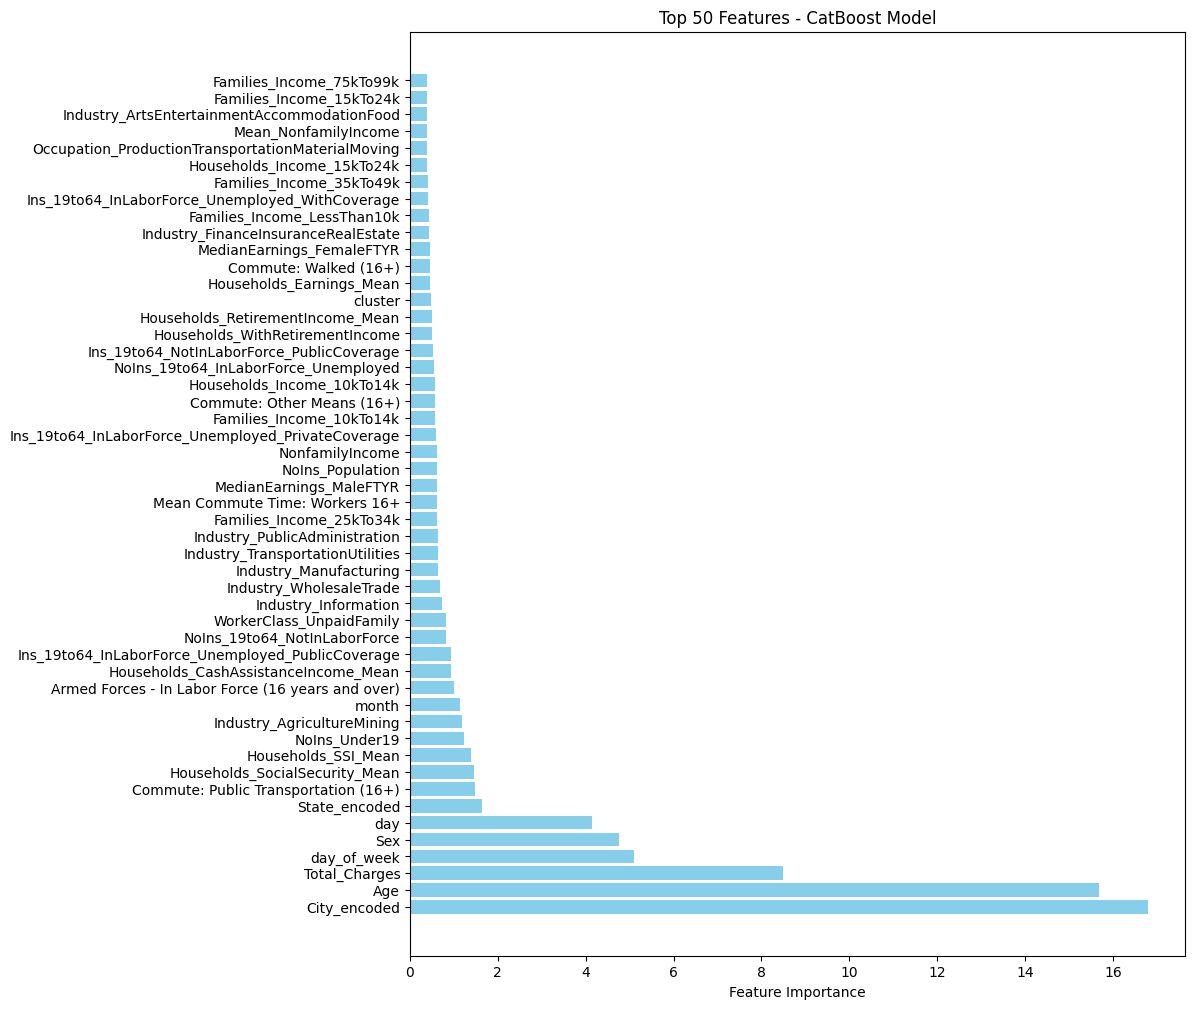

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_50_features = feature_importance_df.head(50)

plt.figure(figsize=(10, 12))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 50 Features - CatBoost Model')
plt.show()

In [ ]:
X = df_outpatient.drop(columns=columns_to_drop)
y = df_outpatient['Update_Status_INV']

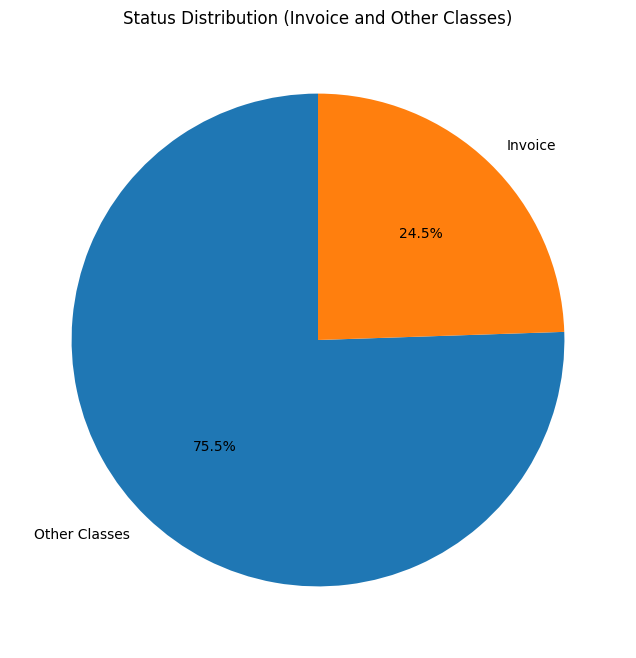

In [ ]:
status_counts = df_outpatient['Update_Status_INV'].value_counts()

status_counts.index = status_counts.index.astype(str).map({'1': 'Invoice', '0': 'Other Classes'})
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Status Distribution (Invoice and Other Classes)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


catboost_model = CatBoostClassifier(iterations=200, depth=10, learning_rate=0.09, loss_function='Logloss')
catboost_model.fit(X_train_resampled, y_train_resampled)

y_pred = catboost_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

0:	learn: 0.6470380	total: 404ms	remaining: 1m 20s
1:	learn: 0.5998300	total: 851ms	remaining: 1m 24s
2:	learn: 0.5708452	total: 1.26s	remaining: 1m 22s
3:	learn: 0.5512024	total: 1.67s	remaining: 1m 21s
4:	learn: 0.5321844	total: 2.11s	remaining: 1m 22s
5:	learn: 0.5174115	total: 2.51s	remaining: 1m 21s
6:	learn: 0.4992357	total: 2.93s	remaining: 1m 20s
7:	learn: 0.4883046	total: 3.34s	remaining: 1m 20s
8:	learn: 0.4792428	total: 3.78s	remaining: 1m 20s
9:	learn: 0.4656485	total: 4.92s	remaining: 1m 33s
10:	learn: 0.4589374	total: 5.31s	remaining: 1m 31s
11:	learn: 0.4540506	total: 5.71s	remaining: 1m 29s
12:	learn: 0.4474021	total: 6.12s	remaining: 1m 28s
13:	learn: 0.4430894	total: 6.67s	remaining: 1m 28s
14:	learn: 0.4365433	total: 7.39s	remaining: 1m 31s
15:	learn: 0.4280868	total: 8.14s	remaining: 1m 33s
16:	learn: 0.4230685	total: 8.83s	remaining: 1m 35s
17:	learn: 0.4175950	total: 9.61s	remaining: 1m 37s
18:	learn: 0.4145128	total: 10.3s	remaining: 1m 38s
19:	learn: 0.4089058	t

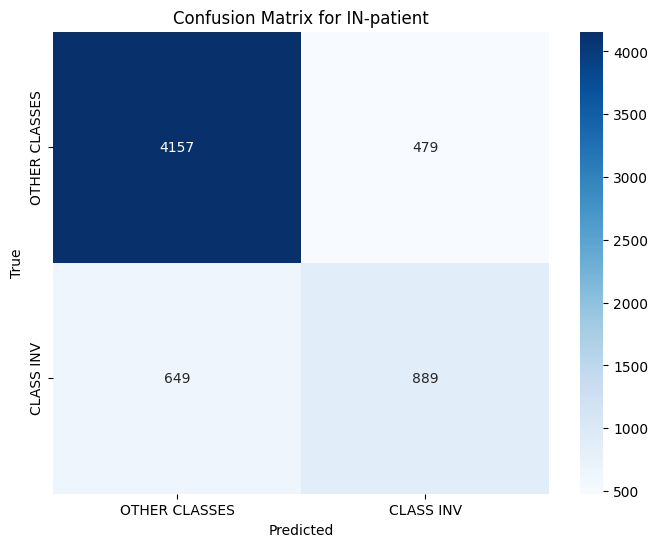

In [ ]:
# Assuming you already have the true labels (y_test) and predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['OTHER CLASSES', 'CLASS INV'], yticklabels=['OTHER CLASSES', 'CLASS INV'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for OUT-patient')
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4636
           1       0.65      0.58      0.61      1538

    accuracy                           0.82      6174
   macro avg       0.76      0.74      0.75      6174
weighted avg       0.81      0.82      0.81      6174



In [ ]:
# Get feature importances
feature_importance = catboost_model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Display the DataFrame
print(feature_importance_df)

                                               Feature  Importance
0                                                  Age    4.441366
1                                                  Sex   11.440518
2                                        Total_Charges    5.467991
3    Employment Status - 16 years and over - In Lab...    0.069238
4           Labor Force - Civilian (16 years and over)    0.056814
..                                                 ...         ...
121                                       City_encoded   10.996439
122                                               year    0.996357
123                                              month    2.619296
124                                                day    5.500095
125                                        day_of_week   37.678717

[126 rows x 2 columns]


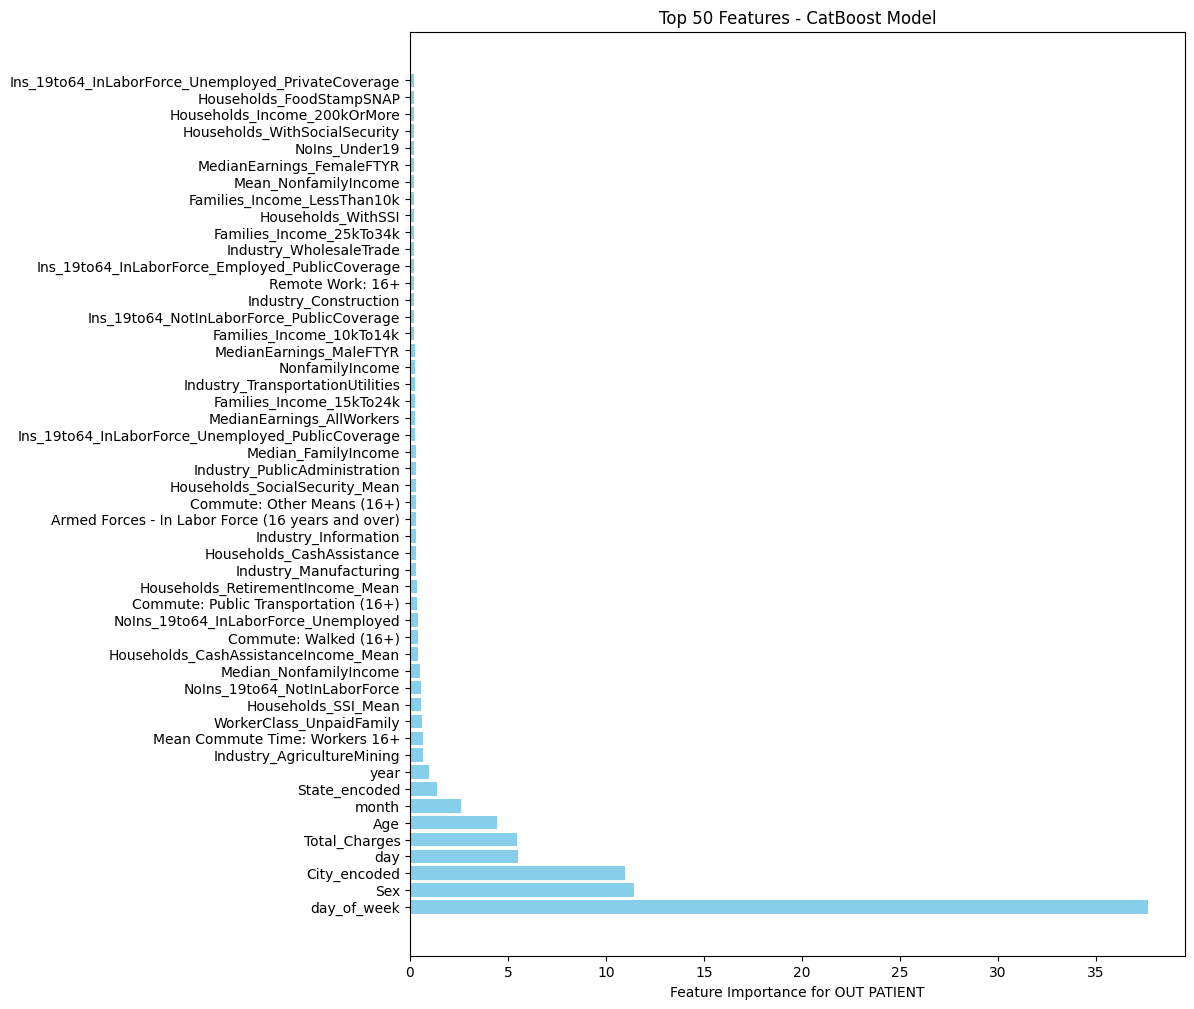

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_50_features = feature_importance_df.head(50)

plt.figure(figsize=(10, 12))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance for OUT PATIENT')
plt.title('Top 50 Features - CatBoost Model')
plt.show()